<a href="https://colab.research.google.com/github/noe2019/Fashion/blob/master/fashion550k_EDA_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion 550k | EDA and Fastai Model

# Setting Fastai Enviroment

This notebook utilize the version 0.6.0 of Fastai

In [0]:
!pip3 install fastai==0.6.0

    100% |████████████████████████████████| 430kB 18.5MB/s 
    100% |████████████████████████████████| 1.4MB 15.1MB/s 
    100% |████████████████████████████████| 1.5MB 17.3MB/s 
    100% |████████████████████████████████| 184kB 32.2MB/s 
    100% |████████████████████████████████| 20.9MB 1.9MB/s 
    100% |████████████████████████████████| 3.6MB 11.2MB/s 
    100% |████████████████████████████████| 71kB 25.5MB/s 
    100% |████████████████████████████████| 51kB 22.2MB/s 
    100% |████████████████████████████████| 5.2MB 7.6MB/s 
    100% |████████████████████████████████| 11.6MB 3.3MB/s 
    100% |████████████████████████████████| 92kB 28.1MB/s 
    100% |████████████████████████████████| 870kB 21.2MB/s 
    100% |████████████████████████████████| 481kB 19.6MB/s 
    100% |████████████████████████████████| 81kB 27.4MB/s 
    100% |████████████████████████████████| 61kB 24.9MB/s 
    100% |████████████████████████████████| 591.8MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

  HTTP error 403 while getting http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl
  Could not install requirement torch==0.3.1.post4 from http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl
Could not install requirement torch==0.3.1.post4 from http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu80/torch-0.3.1.post4-cp36-cp36m-linux_x86_64.whl
    100% |████████████████████████████████| 61kB 5.4MB/s 
    100% |████████████████████████████████| 2.0MB 14.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
  !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
  import cv2
  from os import path
  from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
  platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
  accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
  !pip install --upgrade pip
  #!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
  !pip uninstall -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
  #!pip install -q http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl torchvision
  #!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.2.0.post3-cp36-cp36m-manylinux1_x86_64.whl
  !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.1-{platform}-linux_x86_64.whl torchvision

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Proceed (y/n)? y
Proceed (y/n)? y


In [0]:
from torch import * 
!pip install Pillow==4.1.1
!pip install image
%matplotlib inline
from fastai.imports import *

    100% |████████████████████████████████| 5.7MB 7.5MB/s 
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1


In [0]:
!pip install "torchtext==0.2.3"

    100% |████████████████████████████████| 51kB 5.2MB/s 
  Running setup.py bdist_wheel for torchtext ... - done
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [0]:
!pip install opencv-python

In [0]:
import cv2
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Downloading and untar the Fashion 550k


In [0]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&access_type=offline


Enter verification code: 4/0gDDeRuSjj-CMnWywmeZYOgHxyHg7VumX2ImvFQZ85YTCOpvaZAHPaM
If you need to use ADC, see:
  gcloud auth application-default --help

You are now logged in as [noe.fouotsa@aims-cameroon.org].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [0]:
!gsutil -m cp -r gs://platform-ai-research/datasets/fashion550k/Fashion550k_v1.tar.gz .

Copying gs://platform-ai-research/datasets/fashion550k/Fashion550k_v1.tar.gz...
- [1/1 files][  7.2 GiB/  7.2 GiB] 100% Done  49.1 MiB/s ETA 00:00:00           
Operation completed over 1 objects/7.2 GiB.                                      


In [1]:
!tar -xvf Fashion550k_v1.tar.gz

tar: Fashion550k_v1.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


# EDA Notebook

In [0]:
import os
import numpy as np

In [0]:
path = "fashion550k"
os.listdir(path)

['validids.npy',
 'photos',
 'trainids.npy',
 'annotation',
 'photos.txt',
 'testids.npy',
 'noisyids.npy',
 'duplicateids.npy',
 'train_ids.npy',
 'README.md']

In [0]:
!cat /content//fashion550k/README.md

Fashion550k Dataset

OVERVIEW
--------

This is the Fashion550k dataset subset release that accompanies the paper:

```
   Multi-Label Fashion Image Classification with Minimal Human Supervision
   Naoto Inoue, Edgar Simo-Serra, Toshihiko Yamasaki and Hiroshi Ishikawa
   Workshop on Computer Vision for Fashion, International Computer Vision Conference (CVF-ICCV), 2017
```

If you use this data, please cite it as:
```
@InProceedings{InoueICCVW2017,
   author    = {Naoto Inoue and Edgar Simo-Serra and Toshihiko Yamasaki and Hiroshi Ishikawa},
   title     = {{Multi-Label Fashion Image Classification with Minimal Human Supervision}},
   booktitle = "Proceedings of the International Conference on Computer Vision Workshops (ICCVW)",
   year      = 2017,
}
```

LICENSE
-------

By using this data you agree to the following terms and conditions:

 1. You shall use the Database only for non-commercial research and educational purposes.
 2. The authors and their respective institutions make no 

## Exploring Arrays: train, test, validation, noisy,duplicated, verified

### Train Array

In [0]:
train = np.load(f'{path}/trainids.npy')
train

array([402472, 402473, 402474, ..., 405469, 405470, 405471])

In [0]:
train.size

3000

In [0]:
train.dtype

dtype('int64')

In [0]:
train.shape

(3000,)

In [0]:
Fashion550kUtils.ids_summary(train)

[ 402472 402473 402474 402475 402476 402477 402478 402479 402480 402481
...
405462 405463 405464 405465 405466 405467 405468 405469 405470 405471 ]

Ids range = [402472-405471]
Total number of ids = 3000


### Test Array

In [0]:
test = np.load(f'{path}/testids.npy')
test

array([403589, 403590, 403591, ..., 405586, 405587, 405588])

In [0]:
test.size

2000

In [0]:
test.shape

(2000,)

In [0]:
Fashion550kUtils.ids_summary(test)

In [0]:
Fashion550kUtils.ids_summary(test)

[ 403589 403590 403591 403592 403593 403594 403595 403596 403597 403598
...
405579 405580 405581 405582 405583 405584 405585 405586 405587 405588 ]

Ids range = [403589-405588]
Total number of ids = 2000


### Validation Array



In [0]:
validation = np.load(f'{path}/validids.npy')
validation[:8]

array([403289, 403290, 403291, 403292, 403293, 403294, 403295, 403296])

In [0]:
validation[-10:]

array([403579, 403580, 403581, 403582, 403583, 403584, 403585, 403586,
       403587, 403588])

In [0]:
validation.size

300

In [0]:
validation.shape

(300,)

In [0]:
Fashion550kUtils.ids_summary(validation)

[ 403289 403290 403291 403292 403293 403294 403295 403296 403297 403298
...
403579 403580 403581 403582 403583 403584 403585 403586 403587 403588 ]

Ids range = [403289-403588]
Total number of ids = 300


### Noisy Array

In [0]:
noisy = np.load(f'{path}/noisyids.npy')
noisy

array([     0,      1,      2, ..., 400286, 400287, 400288])

In [0]:
noisy.size

400289

In [0]:
noisy.shape

(400289,)

In [0]:
Fashion550kUtils.ids_summary(noisy)

[ 0 1 2 3 4 5 6 7 8 9
...
400279 400280 400281 400282 400283 400284 400285 400286 400287 400288 ]

Ids range = [0-400288]
Total number of ids = 400289


### Duplicated Array

In [0]:
duplicated = np.load(f'{path}/duplicateids.npy')
duplicated

array([405589, 405590, 405591, ..., 407769, 407770, 407771])

In [0]:
duplicated.size

2183

In [0]:
duplicated.shape

(2183,)

In [0]:
Fashion550kUtils.ids_summary(duplicated)

[ 405589 405590 405591 405592 405593 405594 405595 405596 405597 405598
...
407762 407763 407764 407765 407766 407767 407768 407769 407770 407771 ]

Ids range = [405589-407771]
Total number of ids = 2183


### Verified Array / Annotation

In [0]:
verified = np.load(f'{path}/annotation/verified.npy')
verified

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [0]:
verified.size

26912952

In [0]:
verified.shape

(407772, 66)

In [0]:
Fashion550kUtils.ids_summary(verified)

[ [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

### Noisy Array/ Annotation

In [0]:
noisy_anno = np.load(f'{path}/annotation/verified.npy')
noisy_anno

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [0]:
noisy_anno.size

26912952

In [0]:
noisy_anno.shape

(407772, 66)

In [0]:
Fashion550kUtils.ids_summary(noisy_anno)

[ [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

### Conclusions

There`s a duplicated training file

Test size = 2000 files

Train size = 3000 files

Validation files = 300 files

They consists in arrays sequentialy distributed 

##  Exploring the photos path



In [0]:
import os

### Looking at the directory

There`s 900 path`s in photo directory starting at 100 going to 999

In [0]:
!ls {path}/photos

100  157  214  271  328  385  442  499	556  613  670  727  784  841  898  955
101  158  215  272  329  386  443  500	557  614  671  728  785  842  899  956
102  159  216  273  330  387  444  501	558  615  672  729  786  843  900  957
103  160  217  274  331  388  445  502	559  616  673  730  787  844  901  958
104  161  218  275  332  389  446  503	560  617  674  731  788  845  902  959
105  162  219  276  333  390  447  504	561  618  675  732  789  846  903  960
106  163  220  277  334  391  448  505	562  619  676  733  790  847  904  961
107  164  221  278  335  392  449  506	563  620  677  734  791  848  905  962
108  165  222  279  336  393  450  507	564  621  678  735  792  849  906  963
109  166  223  280  337  394  451  508	565  622  679  736  793  850  907  964
110  167  224  281  338  395  452  509	566  623  680  737  794  851  908  965
111  168  225  282  339  396  453  510	567  624  681  738  795  852  909  966
112  169  226  283  340  397  454  511	568  625  682  739  796  

In [0]:
len(os.listdir((f'{path}/photos')))

900

### Counting and file size

In [0]:

directory = 'fashion550k/photos/102'

number_of_files = len([item for item in os.listdir(directory) if os.path.isfile(os.path.join(directory, item))])

number_of_files

4103

### Looking at random photos

In [0]:
import os
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import imageio
import visvis as vv

In [0]:
files = os.listdir(f'{path}/photos/999')[:5]
files

['9992569587-brown-zara-boots-black-banana-republic-coat-black-zara-jeans_400.jpg',
 '9995233146-white-blazer-black-hanes-top-random-shorts-vnc-shoes-white-nine-west-pur_400.jpg',
 '9998597995-yellow-cupcake-shoes-justfab-heels-lime-green-francescas-collections-dress_400.jpg',
 '9996425139-red-leaf-print-desiree-marie-designs-dress-tawny-naturalizer-bag-dark-brown-_400.jpg',
 '9994794388-black-deichman-boots-silver-new-look-sweater-off-white-lashez-shirt_400.jpg']

> The first 3 numbers correspond to the path name on photos


> The labels names are spread on the files names





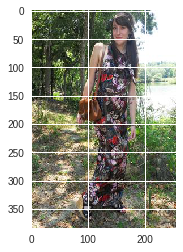

In [0]:

img = plt.imread(f'{path}/photos/999/{files[3]}')
plt.imshow(img);

In [0]:
img[:5,:5]

array([[[ 54,  69,  26],
        [ 52,  70,  22],
        [ 57,  75,  23],
        [ 74,  98,  38],
        [ 53,  79,  14]],

       [[ 55,  70,  29],
        [ 42,  59,  14],
        [ 72,  90,  40],
        [109, 133,  73],
        [ 70,  96,  31]],

       [[ 49,  63,  27],
        [ 40,  57,  15],
        [ 64,  82,  34],
        [ 75,  96,  39],
        [ 60,  86,  21]],

       [[ 50,  64,  31],
        [ 50,  66,  29],
        [ 65,  82,  38],
        [ 51,  71,  18],
        [ 58,  82,  20]],

       [[ 54,  68,  42],
        [ 39,  54,  23],
        [ 59,  75,  36],
        [ 64,  84,  33],
        [ 57,  81,  19]]], dtype=uint8)

In [0]:
img.shape

(384, 256, 3)



> We can verify the size specified in Readme file was right



In [0]:
img = imageio.imread(f'{path}/photos/999/{files[0]}')
img

Array([[[ 91,  92,  34],
        [ 85,  86,  26],
        [ 91,  90,  26],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 93,  93,  43],
        [ 87,  87,  33],
        [ 90,  88,  29],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 70,  70,  32],
        [ 67,  66,  22],
        [ 80,  77,  24],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[142, 169,  88],
        [ 93, 118,  37],
        [ 92, 114,  31],
        ...,
        [ 98, 115,  37],
        [ 68,  86,  12],
        [ 75,  92,  21]],

       [[106, 135,  43],
        [ 93, 120,  27],
        [ 91, 115,  21],
        ...,
        [102, 119,  39],
        [ 79,  97,  21],
        [ 85, 102,  31]],

       [[ 75, 105,   7],
        [150, 178,  78],
        [125, 150,  49],
        ...,
        [ 90, 107,  27],
        [ 82, 100,  24],
        [ 96, 117,  42]]

### Conclusions

There`s 900 path`s in photo directory starting at 100 going to 999.

The size of the images is 384 x 256.

There`s 2183 duplicated files.

## Exploring the labels

---



### Label files

In [0]:
!cat /content//fashion550k/annotation/labels.txt

Black
Gray
White
Cream
Beige
Orange
Pink
Hot-Pink
Red
Ruby-Red
Chartreuse
Olive-Green
Green
Camel
Bronze
Brown
Turquoise-Blue
Light-Blue
Blue
Navy
Yellow
Mustard
Periwinkle
Purple
Gold
Silver
Top
T-Shirt
Blouse
Shirt
Cardigan
Cape
Blazer
Sweatshirt
Vest
Sweater
Jacket
Dress
Coat
Skirt
Pants
Jeans
Shorts
Jumper
Romper
Stockings_Tights
Leggings
Socks
Shoes
Sandals
Boots
Pumps
Flats
Loafers
Sneakers
Hat
Tie
Necklace
Glasses
Sunglasses
Scarf
Watch_Bracelet
Gloves
Swimwear
Bag_Purse
Belt

In [0]:
!cat /content//fashion550k/photos.txt

647/6475795322-6475795322_400.jpg
235/2354760120-2354760120_400.jpg
591/5915788190-5915788190_400.jpg
450/4500194296-4500194296_400.jpg
680/6803143270-6803143270_400.jpg
765/7655367442-7655367442_400.jpg
218/2189985767-2189985767_400.jpg
204/2046140614-2046140614_400.jpg
252/2527521934-2527521934_400.jpg
541/5412155779-5412155779_400.jpg
623/6231558987-6231558987_400.jpg
924/9241899506-9241899506_400.jpg
714/7146676349-7146676349_400.jpg
748/7485886987-7485886987_400.jpg
830/8302691922-8302691922_400.jpg
889/8897640853-8897640853_400.jpg
172/1723468901-1723468901_400.jpg
167/1675695628-1675695628_400.jpg
250/2506327713-2506327713_400.jpg
814/8145445618-8145445618_400.jpg
135/1352099916-1352099916_400.jpg
367/3671383633-3671383633_400.jpg
264/2647171396-2647171396_400.jpg
104/10412512449-10412512449_400.jpg
747/7470890865-7470890865_400.jpg
503/5032265012-5032265012_400.jpg
435/4356259283-4356259283_400.jpg
104/10467902913-10467902913_400.jpg
134/1348524603-1348524603_400.jpg
108/108904

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



lmon-heels_400.jpg
452/4527533727-beige-sweater-carrot-orange-bag-turquoise-blue-skirt-salmon-heels_400.jpg
111/11142232793-beige-sweater-carrot-orange-bag-turquoise-blue-skirt-salmon-heels_400.jpg
511/5115154089-chilli-beans-sunglasses-missguided-jumper-black-kardashian-kollection-heels_400.jpg
109/10999454119-black-three-of-something-jacket-black-kitson-pants_400.jpg
229/2296579653-black-dress-ruby-red-sportsgirl-hat-purple-socks-red-alexander-mcqueen-rin_400.jpg
263/2635223042-black-dress-ruby-red-sportsgirl-hat-purple-socks-red-alexander-mcqueen-rin_400.jpg
782/7825051135-black-dress-ruby-red-sportsgirl-hat-purple-socks-red-alexander-mcqueen-rin_400.jpg
348/3484931026-black-dress-ruby-red-sportsgirl-hat-purple-socks-red-alexander-mcqueen-rin_400.jpg
253/2530708009-julie-brown-dress-blue-uniqlo-shirt-black-she-lo-bag_400.jpg
101/10144713337-navy-dress-navy-sportsgirl-hat-black-asos-tights-cream-cardigan_400.jpg
138/1385164453-navy-dress-navy-sportsgirl-hat-black-asos-tights-cream-ca

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



189625-black-style-nanda-dress_400.jpg
891/8919848011-tan-stylenanda-boots-sky-blue-stylenanda-shorts-silver-stylenanda-top_400.jpg
162/1621519053-gray-nanda-sweatshirt_400.jpg
167/1678477268-navy-levis-jeans-brown-coach-purse-cream-american-eagle-t-shirt_400.jpg
169/1697763422-black-vintage-hat-black-liz-claiborne-heels-black-j-crew-pants_400.jpg
104/10409911220-blue-christian-dior-blazer-white-levis-shirt-gray-levis-jeans-red-dingos-b_400.jpg
827/8273903586-8273903586_400.jpg
468/4682560026-beige-shoes-army-green-blazer-levis-shorts-navy-top_400.jpg
995/9956521165-black-vintage-shorts-plaid-vintage-cape-brown-cole-haan-loafers_400.jpg
977/9779786618-light-yellow-vintagediy-blouse-navy-vintage-shorts-brown-selfmade-ring_400.jpg
743/7433602524-light-pink-floral-house-dress-light-blue-denim-thrifted-jacket_400.jpg
762/7622848835-dark-brown-vintage-sunglasses-heather-gray-lindex-cardigan-ivory-vintage-bel_400.jpg
765/7650731218-black-jean-michel-cazabat-heels_400.jpg
378/3784858961-yello

In [0]:
!ls fashion550k/photos/826/

8260004309-black-forever-21-hat-army-green-forever-21-shirt-gray-free-people-pants_400.jpg
8260018083-beige-coat-beige-scarf-black-dress-black-boots-tights_400.jpg
8260063195-black-cami-sheinside-dress_400.jpg
8260131412-ruby-red-floral-print-vintage-from-ebay-top_400.jpg
8260137954-skirt-green-hat_400.jpg
8260139182-black-retro-round-romwecom-skirt-dark-brown-messenger-banggoodcom-bag_400.jpg
8260147329-turquoise-blue-foreign-exchange-bag-black-glameratti-jumper_400.jpg
8260210176-restrelax-dress-black-guess-vest-black-tights-red-zara-shoes-metro-bag-_400.jpg
8260294783-charcoal-gray-pull-bear-jeans-navy-h-m-shirt-maroon-topshop-bag_400.jpg
8260295503-white-urbanog-dress-red-kitten-faze-hat-urbanog-hat_400.jpg
8260309820-black-black-vince-camuto-boots-cream-forever-21-hat_400.jpg
8260314472-orange-forever-21-top-dark-green-thrifted-skirt-dark-brown-forever-21-clogs_400.jpg
8260333561-black-suede-boots-ruby-red-sheer-dress-black-panda-modcloth-hat_400.jpg
8260346422-brown-bluetique-boo

### Labels Distribution Graphs

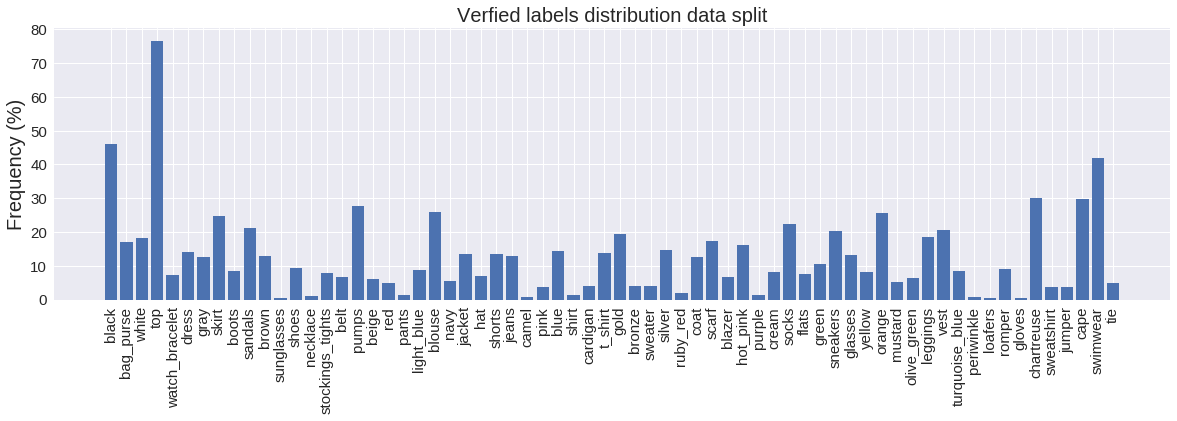

In [0]:
verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[data_split_ids])
sorted_verified_labels_frequency_ids = verified_labels_frequency.argsort()[::-1]
Fashion550kUtils.display_labels_distribution(
    verified_labels_frequency, 
    labels, 
    sorted_verified_labels_frequency_ids, 
    f'Verfied labels distribution data split')

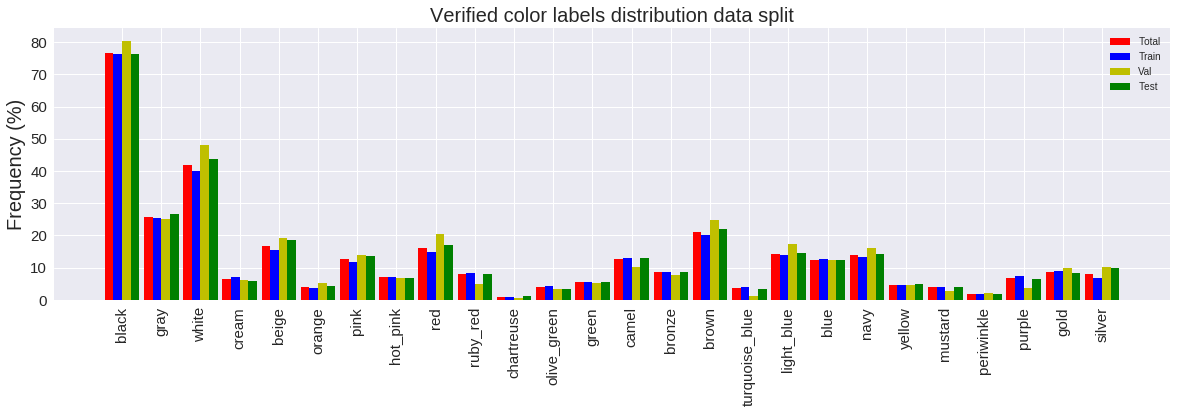

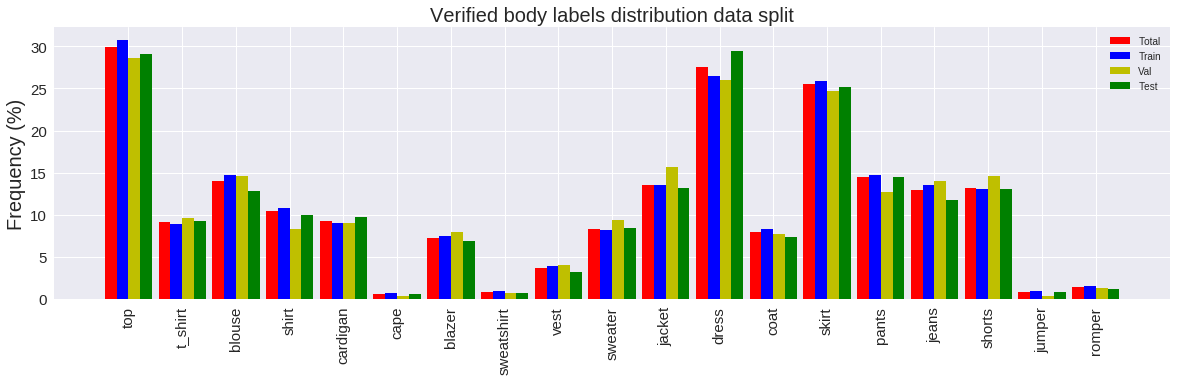

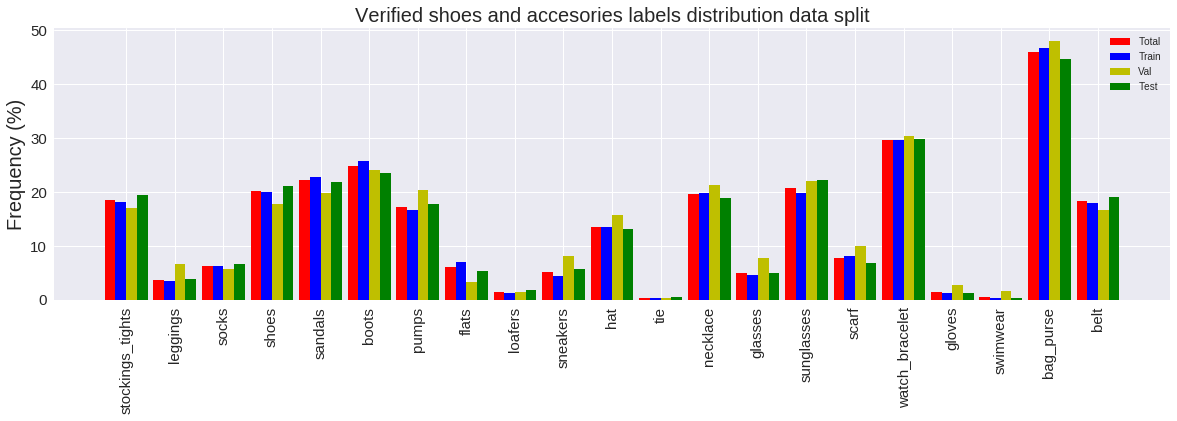

In [0]:
train_verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[train_ids])
val_verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[validids])
test_verified_labels_frequency = Fashion550kUtils.get_data_label_frequency(verified_annotations[testids])

Fashion550kUtils.display_data_split_labels_distribution(
    verified_labels_frequency,
    train_verified_labels_frequency, 
    val_verified_labels_frequency, 
    test_verified_labels_frequency, 
    labels, 
    color_labels_ids,
    'Verified color labels distribution data split'
)
Fashion550kUtils.display_data_split_labels_distribution(
    verified_labels_frequency,
    train_verified_labels_frequency, 
    val_verified_labels_frequency, 
    test_verified_labels_frequency, 
    labels, 
    body_labels_ids,
    'Verified body labels distribution data split'
)
Fashion550kUtils.display_data_split_labels_distribution(
    verified_labels_frequency,
    train_verified_labels_frequency, 
    val_verified_labels_frequency, 
    test_verified_labels_frequency, 
    labels, 
    shoes_accesories_labels_ids,
    'Verified shoes and accesories labels distribution data split'
)

In [0]:
Fashion550kUtils.display_photo_by_label_sample(
    valid_photos_in_file[data_split_ids],
    verified_annotations[data_split_ids],
    photos
)

NameError: ignored

# Fastai multilabel model implementation

##Cleaning the dataset

In [0]:

photos_in_file = Fashion550kUtils.process_photos_file(f'{path}/photos.txt')
Fashion550kUtils.photos_summary(photos_in_file)

['647/6475795322-6475795322_400.jpg' '235/2354760120-2354760120_400.jpg'
 '591/5915788190-5915788190_400.jpg' '450/4500194296-4500194296_400.jpg'
 '680/6803143270-6803143270_400.jpg' '765/7655367442-7655367442_400.jpg'
 '218/2189985767-2189985767_400.jpg' '204/2046140614-2046140614_400.jpg'
 '252/2527521934-2527521934_400.jpg' '541/5412155779-5412155779_400.jpg']
...
['N/A' 'N/A' 'N/A' 'N/A' 'N/A' 'N/A' 'N/A' 'N/A' 'N/A' 'N/A']

Total number of photos = 407772


In [0]:
na_photos_in_file_ids = np.where(photos_in_file == 'N/A')[0]
Fashion550kUtils.ids_summary(na_photos_in_file_ids)

[ 405589 405590 405591 405592 405593 405594 405595 405596 405597 405598
...
407762 407763 407764 407765 407766 407767 407768 407769 407770 407771 ]

Ids range = [405589-407771]
Total number of ids = 2183


In [0]:
noisyids = np.load(f'{path}/noisyids.npy')
train_ids = np.load(f'{path}/train_ids.npy')
trainids = np.load(f'{path}/trainids.npy')
validids = np.load(f'{path}/validids.npy')
testids = np.load(f'{path}/testids.npy')
duplicateids = np.load(f'{path}/duplicateids.npy')

In [0]:
assert len(train_ids)+len(validids)+len(testids) == 5300

In [0]:
del trainids

In [0]:
na_photos_ids_intersection_with_duplicateids = np.intersect1d(na_photos_in_file_ids, duplicateids)
assert len(na_photos_ids_intersection_with_duplicateids) == len(na_photos_in_file_ids) == len(duplicateids)
valid_photos_in_file = photos_in_file[:duplicateids.min()]
assert len(set(valid_photos_in_file)) == len(valid_photos_in_file)
del na_photos_ids_intersection_with_duplicateids
del na_photos_in_file_ids
Fashion550kUtils.photos_summary(valid_photos_in_file)

['647/6475795322-6475795322_400.jpg' '235/2354760120-2354760120_400.jpg'
 '591/5915788190-5915788190_400.jpg' '450/4500194296-4500194296_400.jpg'
 '680/6803143270-6803143270_400.jpg' '765/7655367442-7655367442_400.jpg'
 '218/2189985767-2189985767_400.jpg' '204/2046140614-2046140614_400.jpg'
 '252/2527521934-2527521934_400.jpg' '541/5412155779-5412155779_400.jpg']
...
['106/10645059648-red-dress_400.jpg'
 '340/3403397750-black-h-m-top-black-a-line-chiffon-urban-outfitters-skirt_400.jpg'
 '102/10282396231-brown-brogues-gift-shoes-lime-green-ditsy-print-thrifted-shirt_400.jpg'
 '383/3836370980-sky-blue-tie-dye-threadsence-dress-brown-leather-threadsence-sandals_400.jpg'
 '792/7923844895-white-faux-fur-coat-yellow-cat-ears-hat_400.jpg'
 '790/7909146180-deep-purple-theory-dress-black-barneys-blazer-black-marc-jacobs-bag_400.jpg'
 '797/7977967502-unknown-brand-jeans-black-zara-shirt-beige-zara-beige_400.jpg'
 '392/3922509858-navy-maxi-dress-angl-dress-light-pink-cross-body-ted-baker-bag_400.

In [0]:
labels = Fashion550kUtils.process_labels_file(f'{path}/annotation/labels.txt')
print(labels)
print()
print(f'Total number of labels = {len(labels)}')

['black' 'gray' 'white' 'cream' 'beige' 'orange' 'pink' 'hot_pink' 'red'
 'ruby_red' 'chartreuse' 'olive_green' 'green' 'camel' 'bronze' 'brown'
 'turquoise_blue' 'light_blue' 'blue' 'navy' 'yellow' 'mustard'
 'periwinkle' 'purple' 'gold' 'silver' 'top' 't_shirt' 'blouse' 'shirt'
 'cardigan' 'cape' 'blazer' 'sweatshirt' 'vest' 'sweater' 'jacket' 'dress'
 'coat' 'skirt' 'pants' 'jeans' 'shorts' 'jumper' 'romper'
 'stockings_tights' 'leggings' 'socks' 'shoes' 'sandals' 'boots' 'pumps'
 'flats' 'loafers' 'sneakers' 'hat' 'tie' 'necklace' 'glasses'
 'sunglasses' 'scarf' 'watch_bracelet' 'gloves' 'swimwear' 'bag_purse'
 'belt']

Total number of labels = 66


In [0]:
color_labels_ids = range(26)
body_labels_ids = range(26,45)
shoes_accesories_labels_ids = range(45, len(labels))
print(f'Color labels:\n {labels[color_labels_ids]}')
print()
print(f'Body labels:\n {labels[body_labels_ids]}')
print()
print(f'Shoes and accesories labels:\n {labels[shoes_accesories_labels_ids]}')

Color labels:
 ['black' 'gray' 'white' 'cream' 'beige' 'orange' 'pink' 'hot_pink' 'red'
 'ruby_red' 'chartreuse' 'olive_green' 'green' 'camel' 'bronze' 'brown'
 'turquoise_blue' 'light_blue' 'blue' 'navy' 'yellow' 'mustard'
 'periwinkle' 'purple' 'gold' 'silver']

Body labels:
 ['top' 't_shirt' 'blouse' 'shirt' 'cardigan' 'cape' 'blazer' 'sweatshirt'
 'vest' 'sweater' 'jacket' 'dress' 'coat' 'skirt' 'pants' 'jeans' 'shorts'
 'jumper' 'romper']

Shoes and accesories labels:
 ['stockings_tights' 'leggings' 'socks' 'shoes' 'sandals' 'boots' 'pumps'
 'flats' 'loafers' 'sneakers' 'hat' 'tie' 'necklace' 'glasses'
 'sunglasses' 'scarf' 'watch_bracelet' 'gloves' 'swimwear' 'bag_purse'
 'belt']


In [0]:
noisy_annotations = np.load(f'{path}/annotation/noisy.npy')
verified_annotations = np.load(f'{path}/annotation/verified.npy')
print(noisy_annotations[0])
print('...')
print(noisy_annotations[-1])
print()
print(f'Total number of noisy annotations = {len(noisy_annotations)}')
print()
print(verified_annotations[0])
print('...')
print(verified_annotations[-1])
print()
print(f'Total number of verified annotations = {len(verified_annotations)}')
assert len(noisy_annotations) == len(verified_annotations) == len(photos_in_file)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
...
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]

Total number of noisy annotations = 407772

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
...
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

In [0]:
na_noisy_annotation_ids = Fashion550kUtils.get_na_annotation_ids(noisy_annotations)
Fashion550kUtils.ids_summary(na_noisy_annotation_ids)
assert len(na_noisy_annotation_ids) == len(duplicateids)
na_noisy_annonations_id_intersection = np.intersect1d(na_noisy_annotation_ids, duplicateids)
assert len(na_noisy_annonations_id_intersection) == len(duplicateids)
del na_noisy_annotation_ids
del na_noisy_annonations_id_intersection

[ 405589 405590 405591 405592 405593 405594 405595 405596 405597 405598
...
407762 407763 407764 407765 407766 407767 407768 407769 407770 407771 ]

Ids range = [405589-407771]
Total number of ids = 2183


In [0]:
na_verified_annotation_ids = Fashion550kUtils.get_na_annotation_ids(verified_annotations)
Fashion550kUtils.ids_summary(na_verified_annotation_ids)
assert len(na_verified_annotation_ids) == len(noisyids) + len(duplicateids)
na_verified_annonations_id_intersection = np.intersect1d(na_verified_annotation_ids, 
                                                         np.append(noisyids, duplicateids))
assert len(na_verified_annonations_id_intersection) == len(na_verified_annotation_ids)
del na_verified_annotation_ids
del na_verified_annonations_id_intersection

[ 0 1 2 3 4 5 6 7 8 9
...
407762 407763 407764 407765 407766 407767 407768 407769 407770 407771 ]

Ids range = [0-407771]
Total number of ids = 402472


In [0]:
photos_in_folders = !find * -type f
print(photos_in_folders[0:10])
print('...')
print(photos_in_folders[-10:])
print()
print(f'Total photos in folders = {len(photos_in_folders)}')
#assert len(photos_in_folders) == len(valid_photos_in_file)

In [0]:
sorted_photos_in_folder = sorted(photos_in_folders)
sorted_valid_photos_in_file = sorted(valid_photos_in_file)
different_photo_locations = [(folder, valid) for folder, valid 
                             in zip(sorted_photos_in_folder, sorted_valid_photos_in_file) 
                             if folder.split('-')[0] != valid.split('-')[0]]
assert len(different_photo_locations) == 0
del photos_in_folders
del sorted_photos_in_folder
del sorted_valid_photos_in_file
del different_photo_locations

AssertionError: ignored

In [0]:
data_split_ids = np.append(train_ids, [*validids, *testids])
data_split_photos = valid_photos_in_file[data_split_ids]
photos_with_valid_shape = [photo for photo in data_split_photos 
                           if Fashion550kUtils.is_a_valid_photo_shape(photo)]
assert len(data_split_ids) == len(photos_with_valid_shape)

## Image_classifier.by.array

In [0]:
X_train = 
Y_train = 
X_val = 
Y_val = 
X_test = 

# define architecture
architecture = resnet34

# define data transformation strategy
transformer = tfms_from_model(architecture, sz=32, max_zoom=1.1)

# create data generator from training and validation sets
data = ImageClassifierData.from_arrays(path={path}/photos, 
                                       trn=(X_train, y_train), 
                                       val=(X_val, y_val),
                                       test=(X_test),
                                       bs=64,
                                       classes=class_names,
                                       tfms=transformer)

In [0]:
learn = ConvLearner.pretrained(architecture, data, precompute=True)





## Parameters




Define parameters and fit model. remenber notes

If cycle_len is not defined, then number of epochs equals number of cycles
If cyclelen is defined, the model will use Stochastic Gradient Descent with restarts (SGDR). In this case, number of epochs is not explicitly defined. It is given by: $$\sum&lt;/em&gt;{n=0}^{n=(n_cycle-1)} cycle_len*cycle_mult^{n}$$
Learning rate can be either a float or a list of floats. If list of floats, applies different learning rates to different layers.

In [0]:
learning_rate = 0.1
n_cycle = 2
cycle_len = None
cycle_mult = 1

learn.fit(lrs=learning_rate, n_cycle=n_cycle, cycle_len=cycle_len, cycle_mult=cycle_mult,
          best_save_name='best_weights')

## Predictions and validation

In [0]:
log_preds = learn.predict(is_test=False)
preds = np.argmax(log_preds, axis=1)

# Evaluate
acc = sum(preds==y_val)/preds.shape[0]
print("Accuracy in validation set: {:.4f}".format(acc)

# FUNCTIONS

In [0]:

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

class Fashion550kUtils():
    
    @staticmethod
    def process_photos_file(file_name):
        with open(file_name, 'r') as file:
            photos_list = [line.rstrip('\n') for line in file]
        return np.array(photos_list)

    @staticmethod
    def photos_summary(photos):
        print(photos[0:10])
        print('...')
        print(photos[-10:])
        print()
        print(f'Total number of photos = {len(photos)}') 

    @staticmethod
    def ids_summary(ids):
        print('[', *ids[0:10])
        print('...')
        print(*ids[-10:], ']')
        print()
        print(f'Ids range = [{ids.min()}-{ids.max()}]')
        print(f'Total number of ids = {len(ids)}')

    @staticmethod
    def process_labels_file(file_name):
        with open(file_name, 'r') as file:
            labels = np.array([line.lower().rstrip('\n').replace('-', '_') for line in file])
        return labels

    @staticmethod
    def get_na_annotation_ids(annotations):
        return np.array([ind for ind, annotation in enumerate(annotations) if -1 in annotation])

    @staticmethod
    def is_a_valid_photo_shape(photo):
        img = mpimg.imread(photo)
        return (len(img.shape) == 3 and img.shape == (384, 256, 3))

    @staticmethod
    def get_data_label_frequency(data_labels):
        data_labels_copy = data_labels.copy()
        data_labels_copy[data_labels < 0] = 0
        data_labels_frequency = (data_labels_copy.sum(axis=0)/len(data_labels))*100
        return data_labels_frequency

    @staticmethod
    def display_labels_distribution(data, labels, ids, title):
        _, ax = plt.subplots(figsize=(20,5))
        
        ax.bar(labels[ids], data[ids])

        ax.set_title(title, size=20)
        ax.set_xticklabels(labels[ids])

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        plt.ylabel('Frequency (%)', size=20)
        plt.xticks(rotation=90, size=15)
        plt.yticks(size=15)

        plt.show()

    @staticmethod
    def display_data_split_labels_distribution(total, train, val, test, labels, ids, title):
        _, ax = plt.subplots(figsize=(20,5))
        ind = np.arange(len(ids))
        bar_width = 0.22
        
        total_bar = ax.bar(ind - (bar_width+0.5*bar_width), total[ids], bar_width, color='r', align='center')
        train_bar = ax.bar(ind - 0.5*bar_width, train[ids], bar_width, color='b', align='center')
        val_bar = ax.bar(ind + 0.5*bar_width, val[ids], bar_width, color='y', align='center')
        test_bar = ax.bar(ind + (bar_width+0.5*bar_width), test[ids], bar_width, color='g', align='center')

        ax.set_title(title, size=20)
        ax.set_xticks(ind)
        ax.set_xticklabels(labels[ids])
        ax.legend((total_bar[0], train_bar[0], val_bar[0], test_bar[0]), ('Total', 'Train', 'Val', 'Test'))
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        plt.ylabel('Frequency (%)', size=20)
        plt.xticks(rotation=90, size=15)
        plt.yticks(size=15)

        plt.show()

    @staticmethod
    def display_photo_by_label_sample(photos, annotations, labels):
        _, axs = plt.subplots(11, 6, figsize=(50, 150))
        flat_axs = axs.reshape(-1)
        for ax_ind, ax in enumerate(flat_axs):
            photos_with_label_ind = [ind for ind, annotation in enumerate(annotations) if annotation[ax_ind] == 1]
            np.random.shuffle(photos_with_label_ind)
            selected_photo_with_label = photos[photos_with_label_ind[0]]
            img = mpimg.imread(selected_photo_with_label)
            ax.imshow(img)
            ax.set_title(labels[ax_ind], size=40, pad=20)
            ax.axis('off')

    @staticmethod
    def display_photo_labels(photos, noisy_annotations, verified_annotations, labels):
        ind = np.random.randint(len(photos))
        img=mpimg.imread(photos[ind])
        print(f'Noisy labels = {labels[noisy_annotations[ind] > 0]}')
        print(f'Verified labels = {labels[verified_annotations[ind] > 0]}')
        plt.imshow(img)
        plt.axis('off')